<h1 align=center><font size = 6> Handwritten Digit Recognition using ML</font></h1>

### Importing libraries

CV2 is for importing computer vision and for performing operations related to images.
Numpy is for storing and working upon arrays and matrices.

In [0]:
import cv2
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from PIL import Image
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt


Using TensorFlow backend.


### Let's load training and testing data

In [0]:
train_digits = cv2.imread("digits.png", cv2.IMREAD_GRAYSCALE)
test_digits = cv2.imread("test_digits.png", cv2.IMREAD_GRAYSCALE)

In [0]:
train_digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
test_digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Making sure data is loaded proper

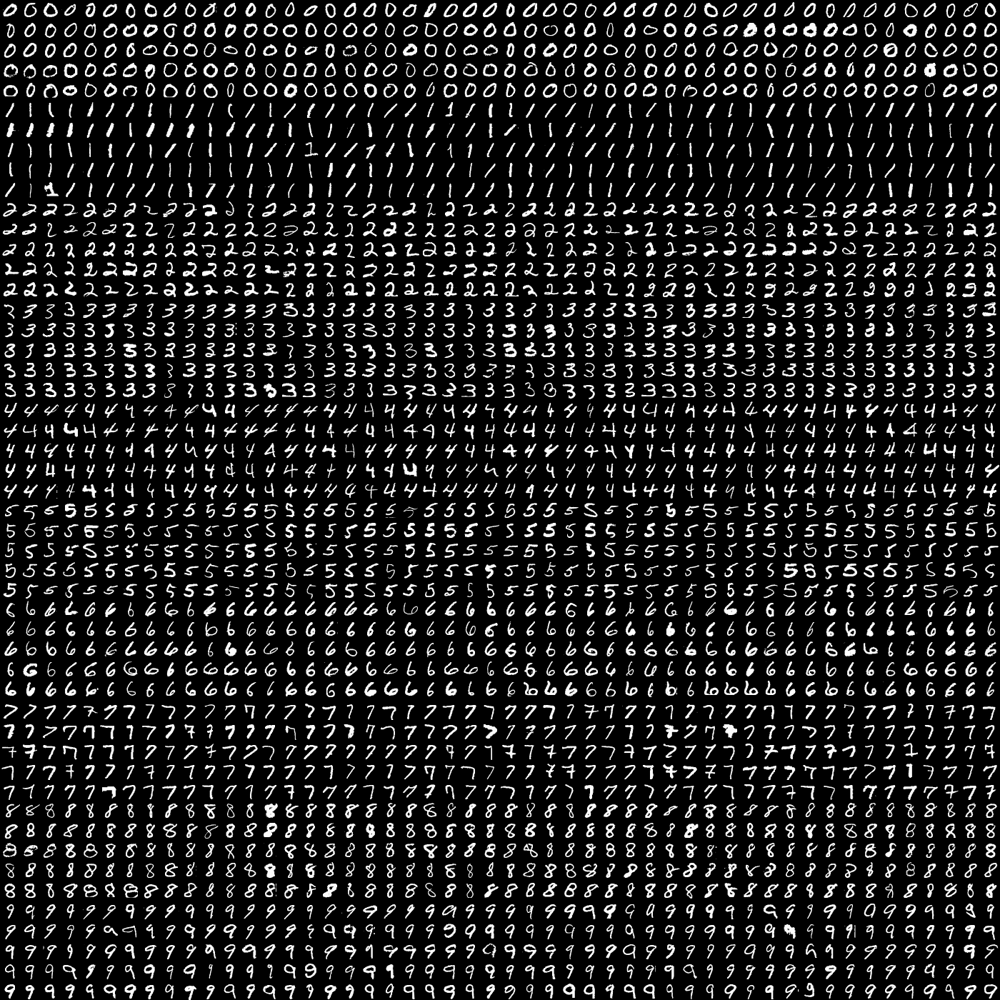

In [0]:
from IPython.display import Image 
Image('digits.png',width=500)
#Image('test_digits.png',width=10)

As observed above, data on which we are training our is a MNIST dataset which means the data is in image form. So, we have to break these images into further smaller images wherein each smaller image consists of one digit.
In order to do this we have to split these images horizontally and vertically based on their shape.
We can do these operations using "vsplit" and "hsplit".

#### Let's start doing this with the training image which is a square image and need to be split into 50x50 images.

In [0]:
rows = np.vsplit(train_digits, 50)
rows

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
 

In [0]:
cells = []
for row in rows:
    row_cells = np.hsplit(row, 50)
    for cell in row_cells:
        cell = cell.flatten()
        cells.append(cell)
cells = np.array(cells, dtype=np.float32)
cells

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Now let's label these training digits to ease our training process

In [0]:
k = np.arange(10)
cells_labels = np.repeat(k, 250)
cells_labels

array([0, 0, 0, ..., 9, 9, 9])

#### Now, let's split the narrow testing image dataset

In [0]:
test_digits = np.vsplit(test_digits, 50)
test_cells = []

In [0]:
for d in test_digits:
    d = d.flatten()
    test_cells.append(d)
test_cells = np.array(test_cells, dtype=np.float32)

#### Now let's define our desired output for the predictions of the test set

In [0]:
y_test=[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,]
#y_test

### Now labelling and data loading being done, let's train and test the image samples using some classifiers and compare the results

# 1. K Nearest Neighbors (KNN)

In [0]:
knn = cv2.ml.KNearest_create()
knn.train(cells, cv2.ml.ROW_SAMPLE, cells_labels)
ret, result, neighbours, dist = knn.findNearest(test_cells, k=3)
knn_accuracy=accuracy_score(y_test,result)
print('Accuracy with KNN is :',knn_accuracy)

Accuracy with KNN is : 0.9


# 2.Decision Trees

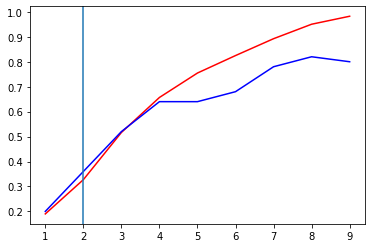

Accuracy with decision tree is : 0.8


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 
accuracy_per_depth = {'train' : [], 'test': []}
for k in range(1, 10):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=k).fit(cells, cells_labels)
    accuracy_per_depth['train'].append(accuracy_score(cells_labels, tree.predict(cells)))
    accuracy_per_depth['test'].append(accuracy_score(y_test, tree.predict(test_cells)))

plt.plot(range(1, 10), accuracy_per_depth['train'], 'r')
plt.plot(range(1, 10), accuracy_per_depth['test'], 'b')
dtree_accuracy=accuracy_score(y_test,tree.predict(test_cells))
plt.axvline(x=2)
plt.show()
print('Accuracy with decision tree is :',dtree_accuracy)

# 3- Support Vector Machine (SVM)

In [0]:
from sklearn import svm
svm_model = svm.SVC(probability=True).fit(cells, cells_labels)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
svmprediction=svm_model.predict(test_cells)
svm_accuracy=accuracy_score(y_test,svmprediction)
print('Accuracy with svm is',svm_accuracy)

Accuracy with svm is 0.96


# 4- Convolutional Neural Networks (CNN)

In [0]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # converts image to vector 28x28 = 754
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # output layer softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 20 )
predictions = model.predict([x_test])
val_loss, val_acc = model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2534 - acc: 0.9256
Epoch 2/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1049 - acc: 0.9678
Epoch 3/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0705 - acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0517 - acc: 0.9831
Epoch 5/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0402 - acc: 0.9866
Epoch 6/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0317 - acc: 0.9896
Epoch 7/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0242 - acc: 0.9919
Epoch 8/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0206 - acc: 0.9927
Epoch 9/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0182 - acc: 0.9940
Epoch 10/20
60000/60000 [==============================] - 

In [0]:
cnn_accuracy=val_acc
cnn_accuracy

0.9752

#Final Comparision report

In [0]:
report_data = [
            {'Algorithm':'KNN', 'The Accuracy': knn_accuracy},
            {'Algorithm':'Decision Tree', 'The Accuracy': dtree_accuracy},
            {'Algorithm':'SVM', 'The Accuracy': svm_accuracy},
            {'Algorithm':'CNN', 'The Accuracy': cnn_accuracy}
] 
report_df = pd.DataFrame(report_data)
report_df

,Algorithm,The Accuracy
0,KNN,0.9000
1,Decision Tree,0.8000
2,SVM,0.9600
3,CNN,0.9752


In [0]:
if(knn_accuracy>dtree_accuracy and knn_accuracy>svm_accuracy and knn_accuracy>cnn_accuracy):
    print('Hence, KNN is preferred for its comparatively good performance with this data with an accuracy score of :',int(knn_accuracy*100),'%')
elif(svm_accuracy>dtree_accuracy and svm_accuracy>cnn_accuracy):
    print('Hence, SVM is preferred for its comparatively good performance with this data with an accuracy score of :',int(svm_accuracy*100),'%')
elif(cnn_accuracy>dtree_accuracy):
    print('Hence, CNN is preferred for its comparatively good performance with this data with an accuracy score of :',int(cnn_accuracy*100),'%')
else:
    print('Hence, Decision Tree is preferred for its comparatively good performance with an accuracy score of :',int(dtree_accuracy*100),'%')    

Hence, CNN is preferred for its comparatively good performance with this data with an accuracy score of : 97 %




---



---



# Let's now check our predictions usnig the best one out of the four approaches:
#CNN

869040


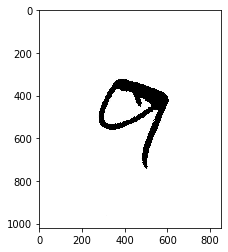

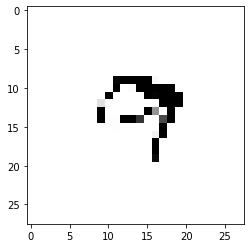

Probability Distribution for 0 2.9353918e-08
Probability Distribution for 1 6.7235434e-10
Probability Distribution for 2 1.9662235e-08
Probability Distribution for 3 1.805079e-08
Probability Distribution for 4 3.571116e-08
Probability Distribution for 5 1.5393162e-09
Probability Distribution for 6 7.897169e-13
Probability Distribution for 7 0.0002765863
Probability Distribution for 8 7.187352e-14
Probability Distribution for 9 0.99972326
The Predicted Value is 9


In [0]:
from PIL import Image
user_test = '9.jpg'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)
print("The Predicted Value is",np.argmax(predicted[0]))